In [17]:
import requests
import pandas as pd
import yaml

In [18]:
with open('./config.yml') as myfile:
    config = yaml.safe_load(myfile)

In [19]:
# ========== CONFIGURATION ==========
API_URL = f"http://{config['host']}:{config['api_port']}"
TOKEN = config['token']


## Use a relaxed peak mag condition in the payload to get all the data 

In [20]:

# --- Define search payload ---
payload = {
    "token": "TOKEN",
    "search": {
        "peak_mag": [
            {
                  "operator": "<",
                  "value": 25
            }
        ]
    }
}



In [24]:
# --- Send POST request ---
search_url = f"{API_URL}/search_objects"
response = requests.post(search_url, json=payload)

In [25]:
pd.DataFrame(response.json(),  columns=['tarxiv_id'])

,tarxiv_id
0,1997bs
1,2014ib
2,2017abr
3,2018mpi
4,2018mpj
...,...
1137,2025nep
1138,2025pb
1139,2025pp
1140,2025qr


## Let's get some data. Example 2025ug


In [26]:
OBJ_NAME = "2025ug"
meta_url = f"{API_URL}/get_object_meta/{OBJ_NAME}"
lc_url = f"{API_URL}/get_object_lc/{OBJ_NAME}"
payload = {"token": TOKEN}

In [27]:
meta_request = requests.post(url = meta_url, json=payload)
lc_request = requests.post(url = lc_url, json=payload)

In [28]:
meta_request.json()

{'schema': 'https://github.com/astrocatalogs/schema/README.md',
 'sources': [{'name': 'tns',
   'bibcode': '2021AAS...23742305G',
   'reference': 'Gal-Yam et al. 2021',
   'alias': 0},
  {'name': 'ztf_survey',
   'bibcode': '2019PASP..131a8002B',
   'reference': 'Belim et al. 2019',
   'alias': 3},
  {'name': 'fink',
   'bibcode': '2021MNRAS.501.3272M',
   'reference': 'Möller et al. 2020',
   'alias': 4},
  {'name': 'mangrove',
   'bibcode': '2020MNRAS.492.4768D',
   'reference': 'Ducoin et al. 2020',
   'alias': 8}],
 'identifiers': [{'name': '2025ug', 'source': 0},
  {'name': 'ZTF25aaayywb', 'source': 3}],
 'ra_deg': [{'value': 160.126969, 'source': 0},
  {'value': 160.1269316, 'source': 3}],
 'dec_deg': [{'value': -4.9911825, 'source': 0},
  {'value': -4.9911522, 'source': 3}],
 'ra_hms': [{'value': '10:40:30.473', 'source': 0}],
 'dec_dms': [{'value': '-04:59:28.26', 'source': 0}],
 'object_type': [{'value': 'TDE', 'source': 0}, {'value': 'TDE', 'source': 0}],
 'discovery_date': [

In [29]:
lc_df = pd.DataFrame(lc_request.json())

In [30]:
lc_df

,mag,mag_err,filter,limit,mjd,unit,survey
0,20.036995,0.136866,g,20.318216,60726.341412,main,ZTF
1,19.984947,0.161199,R,20.259525,60726.333762,main,ZTF
2,19.597359,0.206609,R,19.493885,60716.348819,main,ZTF
3,19.643179,0.164901,R,20.000030,60699.461076,main,ZTF
4,19.260962,0.161061,g,19.866110,60699.376018,main,ZTF
5,19.413795,0.162979,g,19.780148,60694.378912,main,ZTF
6,20.224201,0.210437,g,20.159380,60681.400093,main,ZTF


In [31]:
lc_df['filter'].unique()

array(['g', 'R'], dtype=object)

In [32]:
filter2col = {'g': 'green',
              'R': 'red'
             }

In [33]:
import matplotlib.pyplot as plt

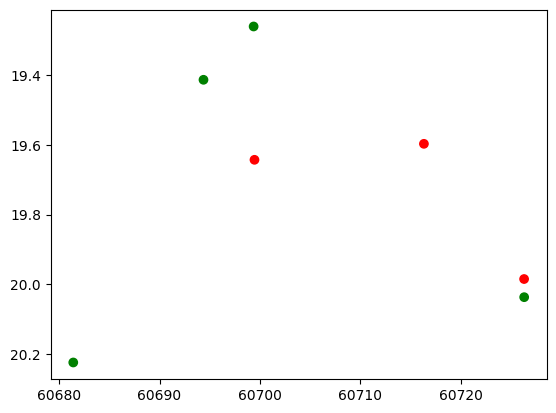

In [34]:
plt.scatter(lc_df['mjd'], lc_df['mag'], color=[filter2col[band] for band in lc_df['filter'].values])
plt.gca().invert_yaxis()